In [66]:
import numpy
import scipy.signal
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

We will simulate a first order plus dead time system under proportional control

In [131]:
K = 1
tau = 1
theta = 1

In [132]:
ts = numpy.linspace(0, 50, 1000)
dt = ts[1]

In [133]:
Kc = 1

In [221]:
def response(Kc):
    y = 0
    ys = numpy.zeros_like(ts)
    r = 1
    for i, t in enumerate(ts):
        e = r - numpy.interp(t - theta, ts, ys)
        u = Kc*e

        dydt = -1/tau*y + 1/tau*u

        y += dydt*dt
        ys[i] = y
    return ys

What does the setpoint response look like?

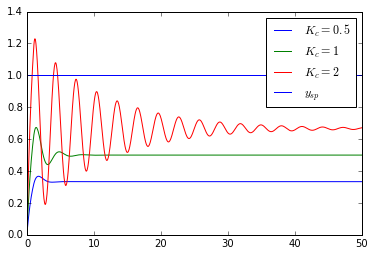

In [222]:
for Kc in [0.5, 1, 2]:
    plt.plot(ts, response(Kc), label='$K_c={}$'.format(Kc))
plt.axhline(1, label='$y_{sp}$')
plt.legend()

These are the error measures in the book (eq 11-35 to 11-37)

In [223]:
def iae(Kc):
    return scipy.integrate.trapz(numpy.abs(response(Kc) - r), ts)

In [224]:
def ise(Kc):
    return scipy.integrate.trapz((response(Kc) - r)**2, ts)

In [225]:
def itae(Kc):
    return scipy.integrate.trapz(numpy.abs(response(Kc) - r)*ts, ts)

In [226]:
errfuns = [iae, ise, itae]

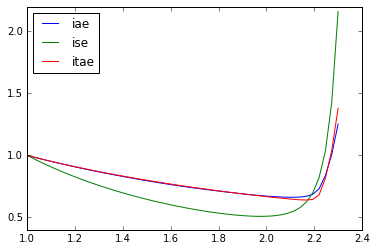

In [227]:
Kcs = numpy.linspace(1, 2.3)
for error in errfuns:
    errors = [error(Kc) for Kc in Kcs]
    plt.plot(Kcs, errors/errors[0], label=error.__name__)
plt.legend(loc='best')

In [228]:
scipy.optimize.minimize(ise, 2)

      fun: 6.389423060252522
 hess_inv: array([[ 0.03203304]])
      jac: array([ -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([ 1.97603537])

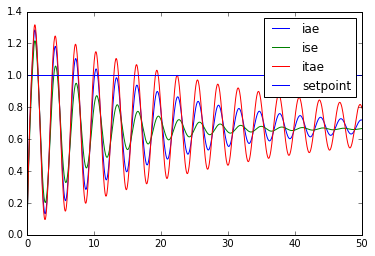

In [229]:
for error in errfuns:
    optimalK = scipy.optimize.minimize(error, 2).x
    plt.plot(ts, response(optimalK), label=error.__name__)
plt.axhline(1, label='setpoint')
plt.legend(loc='best')

What if we didn't know about the `minimize` function? Let's write our own which works by finding a point where the derivative is zero. First we need an estimate of the derivative of a function near a point.

In [230]:
def estimate_derivative(f, x):
    dt = 0.001
    y1 = f(x)
    y2 = f(x + dt)
    return (y2 - y1)/dt

Now we can use `fsolve` to find the zero.

In [232]:
def minimize(f, x0):
    def target(x):
        return estimate_derivative(f, x)
    return scipy.optimize.fsolve(target, x0)
    

In [233]:
estimate_derivative(error, 1)

In [235]:
optimalK = minimize(error, Kc)
optimalK

array([ 2.])

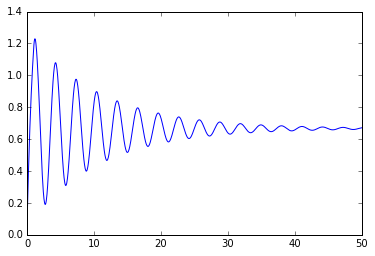

In [236]:
plt.plot(ts, response(optimalK))

We get a similar answer!